#Houston Model Training

Perform a basic logistic regression on the dataset.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('airbnb_Houston.csv')

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# 'Nightly Rate' is the nightly rate for booking, 'booked_days' represents the number of days a listing is booked.
# Add more relevant features based on your dataset.

# Select relevant columns from the provided list
selected_columns = [
    'Superhost', 'Nightly Rate', 'booked_days',
    'Rating Overall', 'numReviews_pastYear'
]

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Convert 'Superhost' to a dummy variable
df_selected['is_Superhost'] = df_selected['Superhost'].astype('category')

# Create a binary outcome variable based on a threshold for 'booked_days'
threshold = 5  # Adjust the threshold as needed
df_selected['booked'] = np.where(df_selected['booked_days'] > threshold, 1, 0)

# Model specification for logistic regression
X = sm.add_constant(df_selected[['Nightly Rate', 'is_Superhost', 'Rating Overall', 'numReviews_pastYear']])
y = df_selected['booked']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the logistic regression summary
print(model.summary())

# Exponentiate the coefficients to get odds ratios
odds_ratios = pd.DataFrame({'Odds Ratio': round(np.exp(model.params), 4)})
print("\nOdds Ratios:")
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.456040
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 booked   No. Observations:                39288
Model:                          Logit   Df Residuals:                    39283
Method:                           MLE   Df Model:                            4
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                 0.02259
Time:                        00:45:42   Log-Likelihood:                -17917.
converged:                       True   LL-Null:                       -18331.
Covariance Type:            nonrobust   LLR p-value:                5.980e-178
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6313      0.135      4.684      0.000       0.367       0.895
Ni

Find the correlation between 'Superhost' and 'Nightly Rate' without outliers.

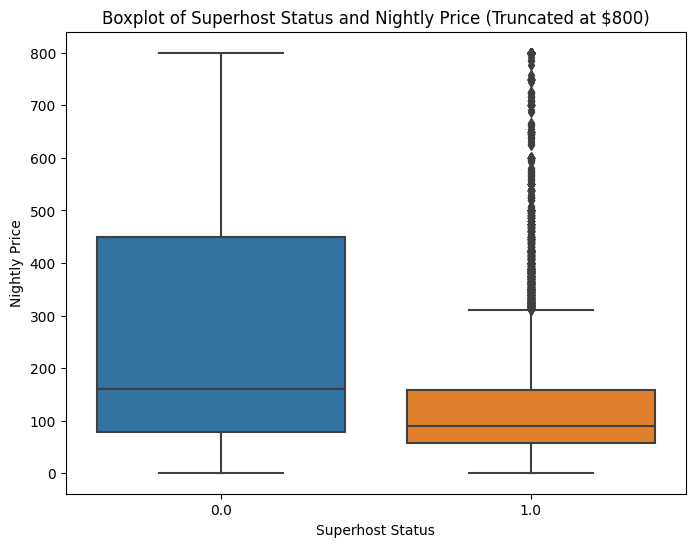

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('airbnb_Houston.csv')

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# 'Nightly Rate' is the nightly rate for booking.

# Select relevant columns
selected_columns = ['Superhost', 'Nightly Rate']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Truncate values over $800 for 'Nightly Rate'
df_selected['Nightly Rate'] = df_selected['Nightly Rate'].apply(lambda x: min(x, 800))

# Plot the correlation between 'Superhost' and 'Nightly Rate' without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Superhost', y='Nightly Rate', data=df_selected)
plt.title('Boxplot of Superhost Status and Nightly Price (Truncated at $800)')
plt.xlabel('Superhost Status')
plt.ylabel('Nightly Price')
plt.show()


Find the correlation between 'Superhost' and 'available_days'

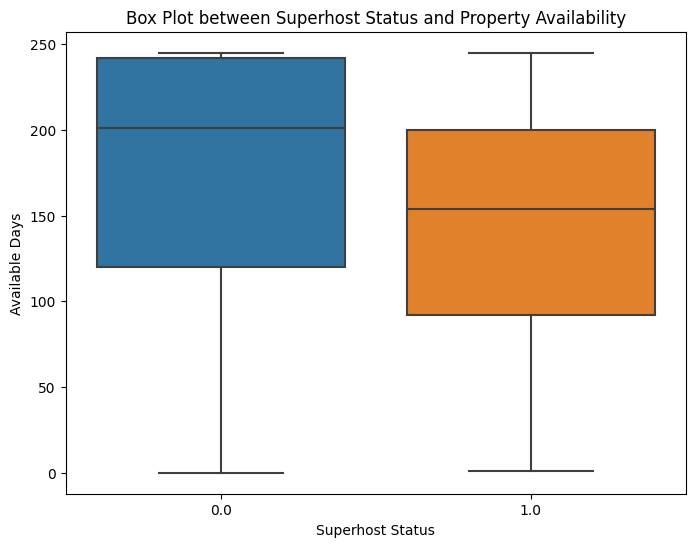

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('airbnb_Houston.csv')

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# 'available_days' represents the number of days the listing is available for booking.

# Select relevant columns
selected_columns = ['Superhost', 'available_days']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Plot the correlation between 'Superhost' and 'available_days'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Superhost', y='available_days', data=df_selected)
plt.title('Box Plot between Superhost Status and Property Availability')
plt.xlabel('Superhost Status')
plt.ylabel('Available Days')
plt.show()


traing a gradient boosting model

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('airbnb_Houston.csv')

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# Features for prediction can include 'Nightly Rate', 'Rating Overall', 'number_of_reviews', 'available_days', etc.

# Select relevant columns
selected_columns = [
    'Superhost', 'Nightly Rate', 'Rating Overall',
    'numReviews_pastYear', 'available_days', 'Bedrooms', 'Bathrooms'
]

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Handle categorical variables (if any)
df_selected = pd.get_dummies(df_selected, columns=['Bedrooms', 'Bathrooms'], drop_first=True)

# Drop rows with missing values
df_selected = df_selected.dropna()

# Separate features and target variable
X = df_selected.drop('Superhost', axis=1)
y = df_selected['Superhost']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model for binary classification (logistic regression)
model = xgb.XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of being a superhost

# Evaluate the model using ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, (y_pred_proba > 0.5).astype(int))
classification_rep = classification_report(y_test, (y_pred_proba > 0.5).astype(int))

# Print the evaluation metrics
print(f'ROC-AUC Score: {roc_auc:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


ROC-AUC Score: 0.90
Confusion Matrix:
[[5884  999]
 [ 932 3027]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      6883
         1.0       0.75      0.76      0.76      3959

    accuracy                           0.82     10842
   macro avg       0.81      0.81      0.81     10842
weighted avg       0.82      0.82      0.82     10842



Gradient boosting model graphs

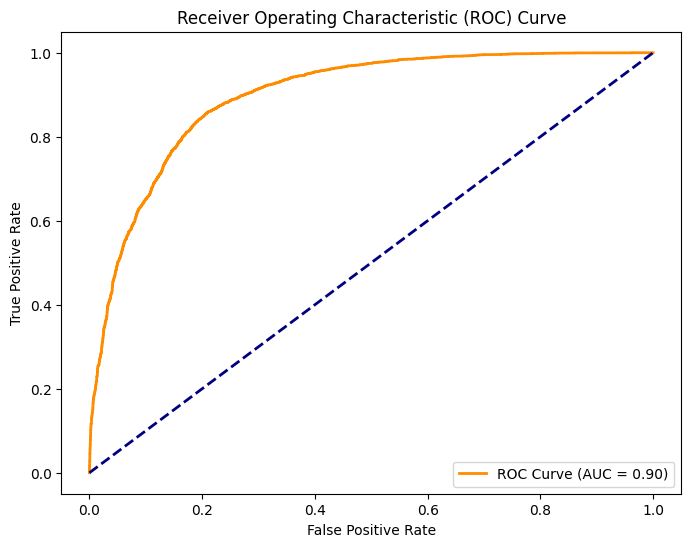

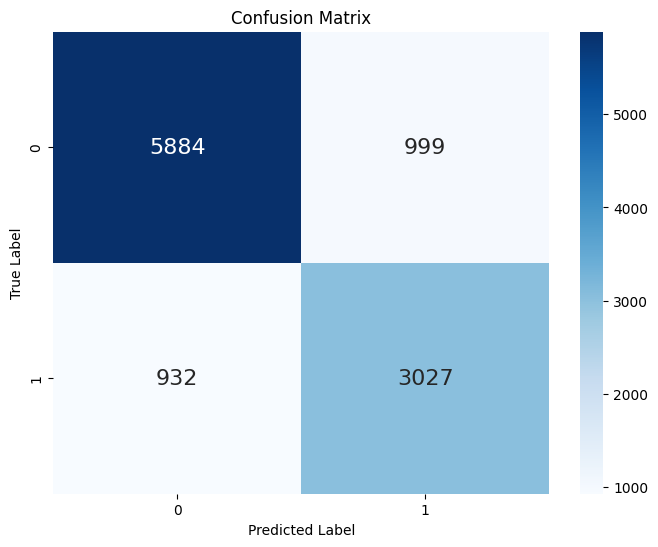

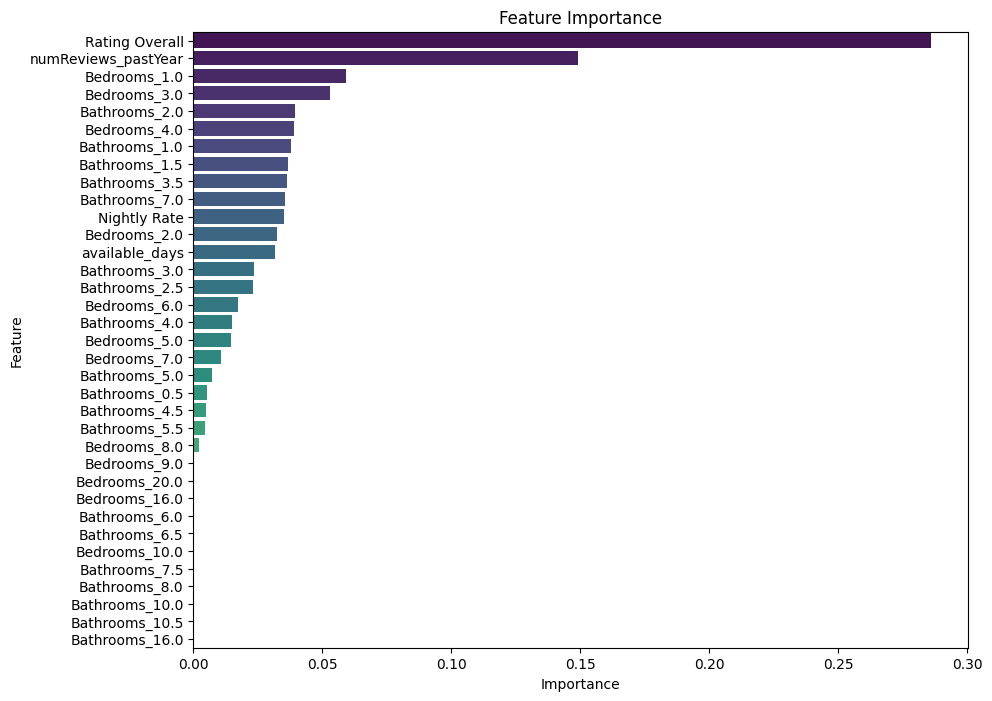

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
pip install tensorflow

Neural Network Hyperparameter tuning and optimization

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Load the dataset
df = pd.read_csv('airbnb_Houston.csv')

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# Features for prediction can include 'Nightly Rate', 'Rating Overall', 'number_of_reviews', 'available_days', etc.

# Select relevant columns
selected_columns = [
    'Superhost', 'Nightly Rate', 'Rating Overall',
    'numReviews_pastYear', 'available_days', 'Bedrooms', 'Bathrooms'
]

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Handle categorical variables (if any)
df_selected = pd.get_dummies(df_selected, columns=['Bedrooms', 'Bathrooms'], drop_first=True)

# Drop rows with missing values
df_selected = df_selected.dropna()

# Separate features and target variable
X = df_selected.drop('Superhost', axis=1)
y = df_selected['Superhost']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
def create_model(layers=2, neurons=64, dropout_rate=0.5):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    for _ in range(layers - 1):
        model.add(tf.keras.layers.Dropout(dropout_rate))
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))

    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Perform a manual hyperparameter search
best_params = None
best_roc_auc = 0.0

# Define hyperparameters for tuning
layers_values = [1, 2, 3]
neurons_values = [32, 64, 128]
dropout_values = [0.3, 0.5, 0.7]

# Iterate through hyperparameters
for layers in layers_values:
    for neurons in neurons_values:
        for dropout_rate in dropout_values:
            # Create and train the model
            model = create_model(layers=layers, neurons=neurons, dropout_rate=dropout_rate)
            model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=0)

            # Make predictions on the testing data
            y_pred_proba = model.predict(X_test_scaled)

            # Evaluate the model using ROC-AUC score
            roc_auc = roc_auc_score(y_test, y_pred_proba)

            # Update the best parameters if current model performs better
            if roc_auc > best_roc_auc:
                best_roc_auc = roc_auc
                best_params = {'layers': layers, 'neurons': neurons, 'dropout_rate': dropout_rate}

# Print the best parameters and corresponding ROC-AUC score
print("Best Parameters: ", best_params)
print("Best ROC-AUC Score: ", best_roc_auc)


339/339 [==============================] - 1s 1ms/step
Best Parameters:  {'layers': 3, 'neurons': 128, 'dropout_rate': 0.3}
Best ROC-AUC Score:  0.8468947126468502


Neural Network Graphs

339/339 [==============================] - 1s 2ms/step


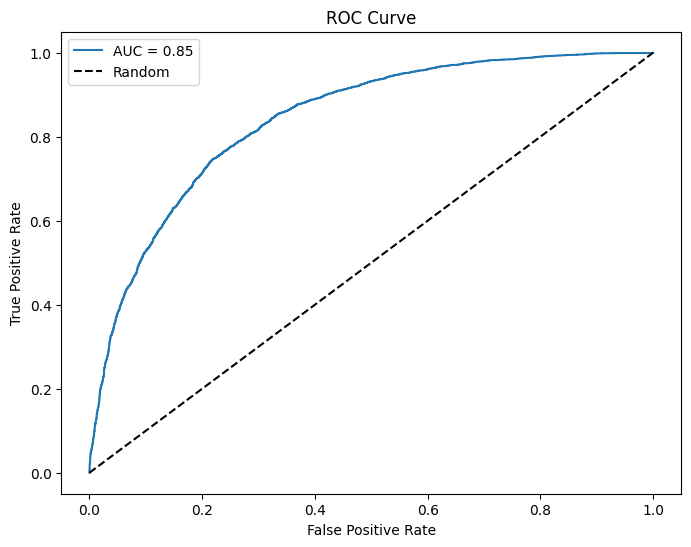

<Figure size 800x600 with 0 Axes>

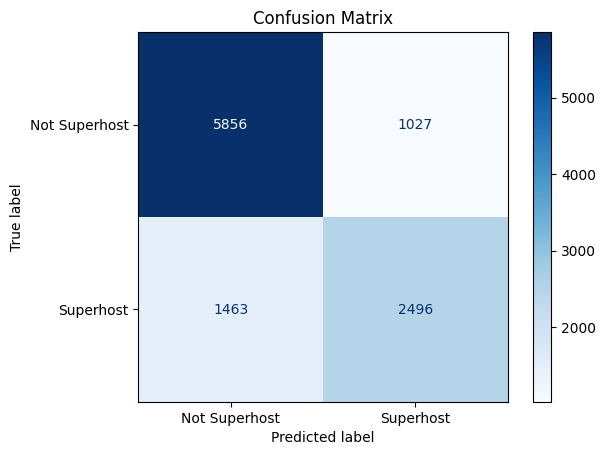

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Best hyperparameters
best_layers = best_params['layers']
best_neurons = best_params['neurons']
best_dropout_rate = best_params['dropout_rate']

# Create and train the final model
final_model = create_model(layers=best_layers, neurons=best_neurons, dropout_rate=best_dropout_rate)
final_model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=0)

# Make predictions on the testing data
y_pred_proba = final_model.predict(X_test_scaled)

# ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {best_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = (y_pred_proba > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Superhost', 'Superhost'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


#Chicago Model Training


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('airbnb_Chicago.csv')

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# 'Nightly Rate' is the nightly rate for booking, 'booked_days' represents the number of days a listing is booked.
# Add more relevant features based on your dataset.

# Select relevant columns from the provided list
selected_columns = [
    'Superhost', 'Nightly Rate', 'booked_days',
    'Rating Overall', 'numReviews_pastYear'
]

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Convert 'Superhost' to a dummy variable
df_selected['is_Superhost'] = df_selected['Superhost'].astype('category')

# Create a binary outcome variable based on a threshold for 'booked_days'
threshold = 5  # Adjust the threshold as needed
df_selected['booked'] = np.where(df_selected['booked_days'] > threshold, 1, 0)

# Model specification for logistic regression
X = sm.add_constant(df_selected[['Nightly Rate', 'is_Superhost', 'Rating Overall', 'numReviews_pastYear']])
y = df_selected['booked']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the logistic regression summary
print(model.summary())

# Exponentiate the coefficients to get odds ratios
odds_ratios = pd.DataFrame({'Odds Ratio': round(np.exp(model.params), 4)})
print("\nOdds Ratios:")
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.416022
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 booked   No. Observations:                69042
Model:                          Logit   Df Residuals:                    69037
Method:                           MLE   Df Model:                            4
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                 0.01767
Time:                        00:55:32   Log-Likelihood:                -28723.
converged:                       True   LL-Null:                       -29240.
Covariance Type:            nonrobust   LLR p-value:                2.305e-222
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7431      0.137      5.422      0.000       0.474       1.012
Ni

Find the correlation between 'Superhost' and 'Nightly Rate' without outliers.

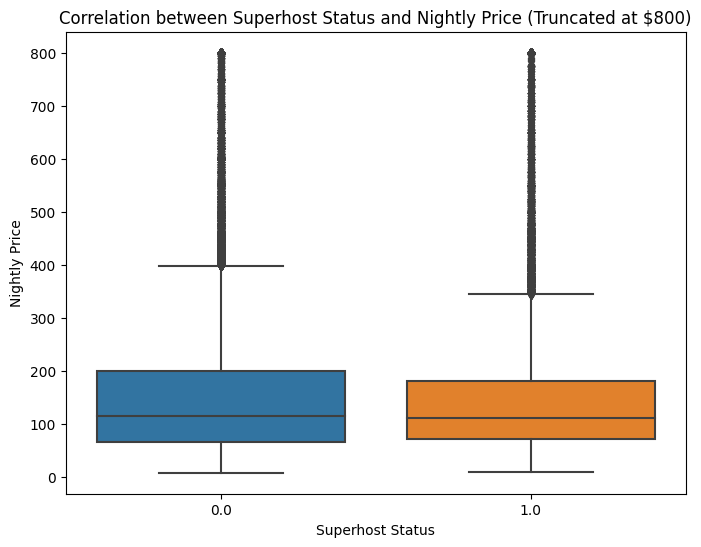

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('airbnb_Chicago.csv')

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# 'Nightly Rate' is the nightly rate for booking.

# Select relevant columns
selected_columns = ['Superhost', 'Nightly Rate']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Truncate values over $800 for 'Nightly Rate'
df_selected['Nightly Rate'] = df_selected['Nightly Rate'].apply(lambda x: min(x, 800))

# Plot the correlation between 'Superhost' and 'Nightly Rate' without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Superhost', y='Nightly Rate', data=df_selected)
plt.title('Correlation between Superhost Status and Nightly Price (Truncated at $800)')
plt.xlabel('Superhost Status')
plt.ylabel('Nightly Price')
plt.show()


Find the correlation between 'Superhost' and 'available_days'

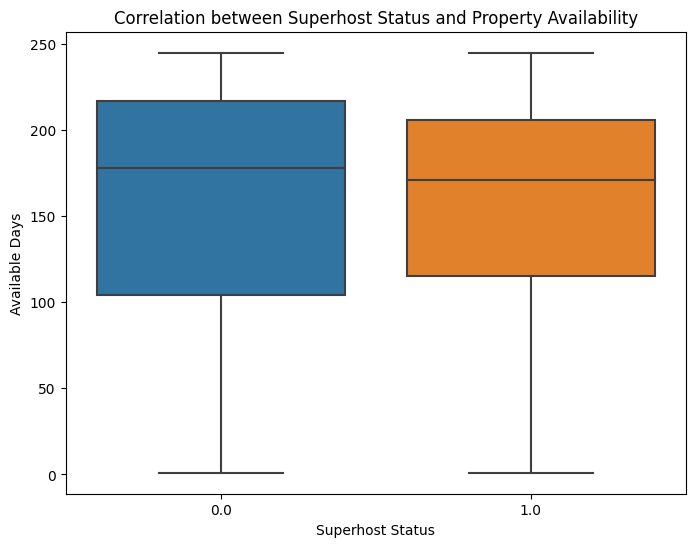

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('airbnb_Chicago.csv')

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# 'available_days' represents the number of days the listing is available for booking.

# Select relevant columns
selected_columns = ['Superhost', 'available_days']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Plot the correlation between 'Superhost' and 'available_days'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Superhost', y='available_days', data=df_selected)
plt.title('Correlation between Superhost Status and Property Availability')
plt.xlabel('Superhost Status')
plt.ylabel('Available Days')
plt.show()


traing a gradient boosting model

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('airbnb_Chicago.csv')

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# Features for prediction can include 'Nightly Rate', 'Rating Overall', 'number_of_reviews', 'available_days', etc.

# Select relevant columns
selected_columns = [
    'Superhost', 'Nightly Rate', 'Rating Overall',
    'numReviews_pastYear', 'available_days', 'Bedrooms', 'Bathrooms'
]

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Handle categorical variables (if any)
df_selected = pd.get_dummies(df_selected, columns=['Bedrooms', 'Bathrooms'], drop_first=True)

# Drop rows with missing values
df_selected = df_selected.dropna()

# Separate features and target variable
X = df_selected.drop('Superhost', axis=1)
y = df_selected['Superhost']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model for binary classification (logistic regression)
model = xgb.XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of being a superhost

# Evaluate the model using ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, (y_pred_proba > 0.5).astype(int))
classification_rep = classification_report(y_test, (y_pred_proba > 0.5).astype(int))

# Print the evaluation metrics
print(f'ROC-AUC Score: {roc_auc:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


ROC-AUC Score: 0.89
Confusion Matrix:
[[8119 1777]
 [1477 5671]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      9896
         1.0       0.76      0.79      0.78      7148

    accuracy                           0.81     17044
   macro avg       0.80      0.81      0.81     17044
weighted avg       0.81      0.81      0.81     17044



Gradient boosting model graphs

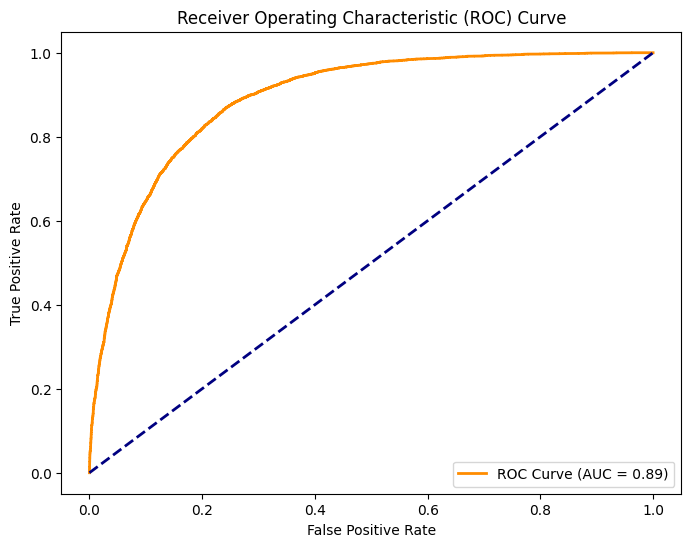

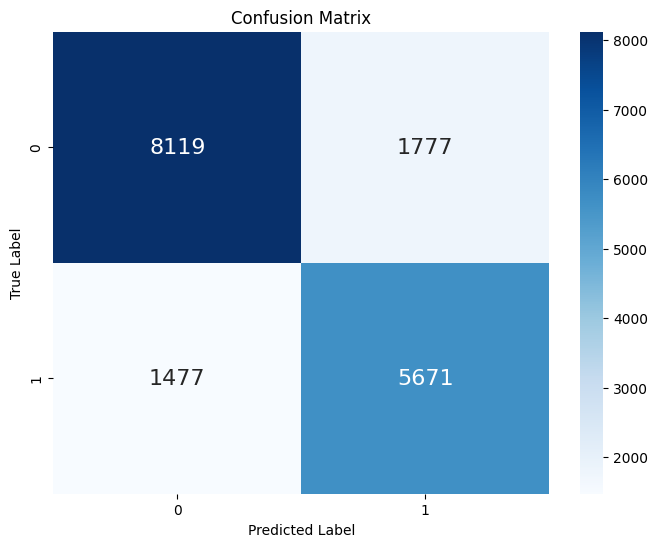

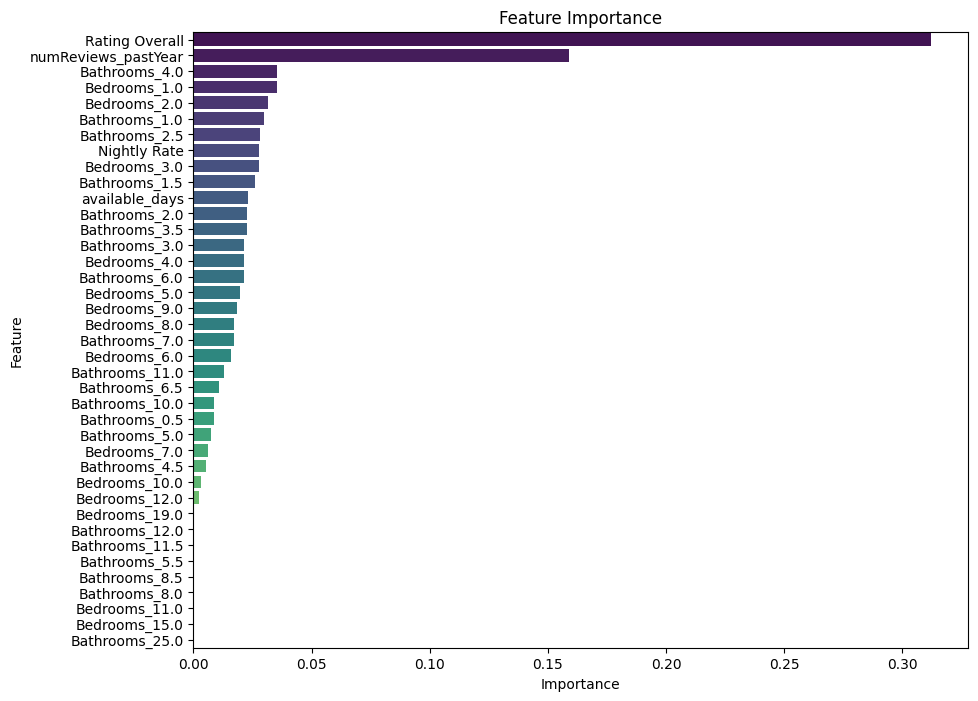

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Neural Network Hyperparameter tuning and optimization

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Load the dataset
df = pd.read_csv('airbnb_Chicago.csv')

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# Features for prediction can include 'Nightly Rate', 'Rating Overall', 'number_of_reviews', 'available_days', etc.

# Select relevant columns
selected_columns = [
    'Superhost', 'Nightly Rate', 'Rating Overall',
    'numReviews_pastYear', 'available_days', 'Bedrooms', 'Bathrooms'
]

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Handle categorical variables (if any)
df_selected = pd.get_dummies(df_selected, columns=['Bedrooms', 'Bathrooms'], drop_first=True)

# Drop rows with missing values
df_selected = df_selected.dropna()

# Separate features and target variable
X = df_selected.drop('Superhost', axis=1)
y = df_selected['Superhost']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
def create_model(layers=2, neurons=64, dropout_rate=0.5):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    for _ in range(layers - 1):
        model.add(tf.keras.layers.Dropout(dropout_rate))
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))

    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Perform a manual hyperparameter search
best_params = None
best_roc_auc = 0.0

# Define hyperparameters for tuning
layers_values = [1, 2, 3]
neurons_values = [32, 64, 128]
dropout_values = [0.3, 0.5, 0.7]

# Iterate through hyperparameters
for layers in layers_values:
    for neurons in neurons_values:
        for dropout_rate in dropout_values:
            # Create and train the model
            model = create_model(layers=layers, neurons=neurons, dropout_rate=dropout_rate)
            model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=0)

            # Make predictions on the testing data
            y_pred_proba = model.predict(X_test_scaled)

            # Evaluate the model using ROC-AUC score
            roc_auc = roc_auc_score(y_test, y_pred_proba)

            # Update the best parameters if current model performs better
            if roc_auc > best_roc_auc:
                best_roc_auc = roc_auc
                best_params = {'layers': layers, 'neurons': neurons, 'dropout_rate': dropout_rate}

# Print the best parameters and corresponding ROC-AUC score
print("Best Parameters: ", best_params)
print("Best ROC-AUC Score: ", best_roc_auc)


533/533 [==============================] - 1s 1ms/step
Best Parameters:  {'layers': 2, 'neurons': 128, 'dropout_rate': 0.3}
Best ROC-AUC Score:  0.8669954247735486


Neural Network Graphs

533/533 [==============================] - 1s 1ms/step


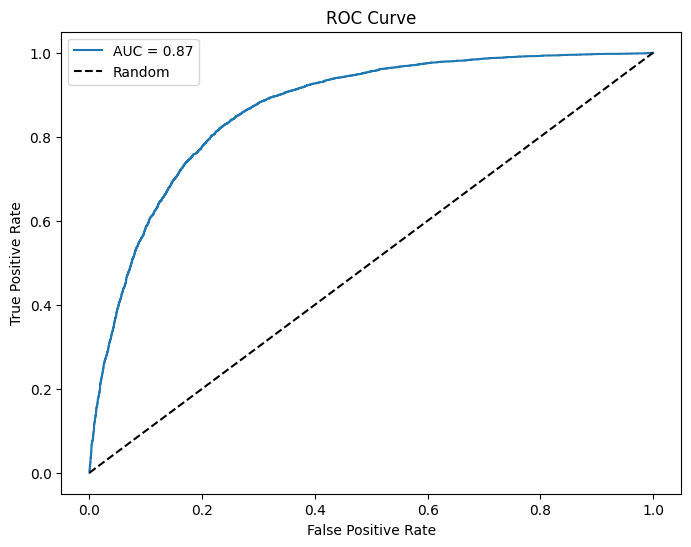

<Figure size 800x600 with 0 Axes>

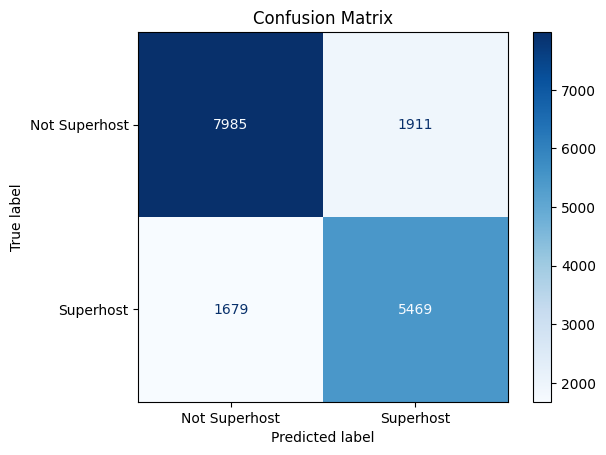

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Best hyperparameters
best_layers = best_params['layers']
best_neurons = best_params['neurons']
best_dropout_rate = best_params['dropout_rate']

# Create and train the final model
final_model = create_model(layers=best_layers, neurons=best_neurons, dropout_rate=best_dropout_rate)
final_model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=0)

# Make predictions on the testing data
y_pred_proba = final_model.predict(X_test_scaled)

# ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {best_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = (y_pred_proba > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Superhost', 'Superhost'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


#Both Cities

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
df1 = pd.read_csv('airbnb_Chicago.csv')
df2 = pd.read_csv('airbnb_Houston.csv')

df = pd.concat([df1,df2],ignore_index=True)

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# 'Nightly Rate' is the nightly rate for booking, 'booked_days' represents the number of days a listing is booked.
# Add more relevant features based on your dataset.

# Select relevant columns from the provided list
selected_columns = [
    'Superhost', 'Nightly Rate', 'booked_days',
    'Rating Overall', 'numReviews_pastYear'
]

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Convert 'Superhost' to a dummy variable
df_selected['is_Superhost'] = df_selected['Superhost'].astype('category')

# Create a binary outcome variable based on a threshold for 'booked_days'
threshold = 5  # Adjust the threshold as needed
df_selected['booked'] = np.where(df_selected['booked_days'] > threshold, 1, 0)

# Model specification for logistic regression
X = sm.add_constant(df_selected[['Nightly Rate', 'is_Superhost', 'Rating Overall', 'numReviews_pastYear']])
y = df_selected['booked']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the logistic regression summary
print(model.summary())

# Exponentiate the coefficients to get odds ratios
odds_ratios = pd.DataFrame({'Odds Ratio': round(np.exp(model.params), 4)})
print("\nOdds Ratios:")
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.431563
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 booked   No. Observations:               108330
Model:                          Logit   Df Residuals:                   108325
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                 0.01855
Time:                        19:35:28   Log-Likelihood:                -46751.
converged:                       True   LL-Null:                       -47635.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7163      0.097      7.406      0.000       0.527       0.906
Ni

Find the correlation between 'Superhost' and 'Nightly Rate' without outliers.

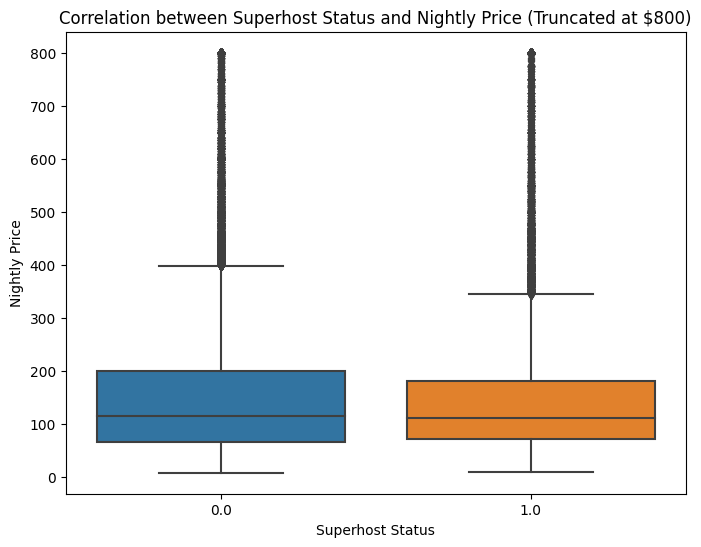

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('airbnb_Chicago.csv')

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# 'Nightly Rate' is the nightly rate for booking.

# Select relevant columns
selected_columns = ['Superhost', 'Nightly Rate']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Truncate values over $800 for 'Nightly Rate'
df_selected['Nightly Rate'] = df_selected['Nightly Rate'].apply(lambda x: min(x, 800))

# Plot the correlation between 'Superhost' and 'Nightly Rate' without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Superhost', y='Nightly Rate', data=df_selected)
plt.title('Correlation between Superhost Status and Nightly Price (Truncated at $800)')
plt.xlabel('Superhost Status')
plt.ylabel('Nightly Price')
plt.show()


Find the correlation between 'Superhost' and 'available_days'

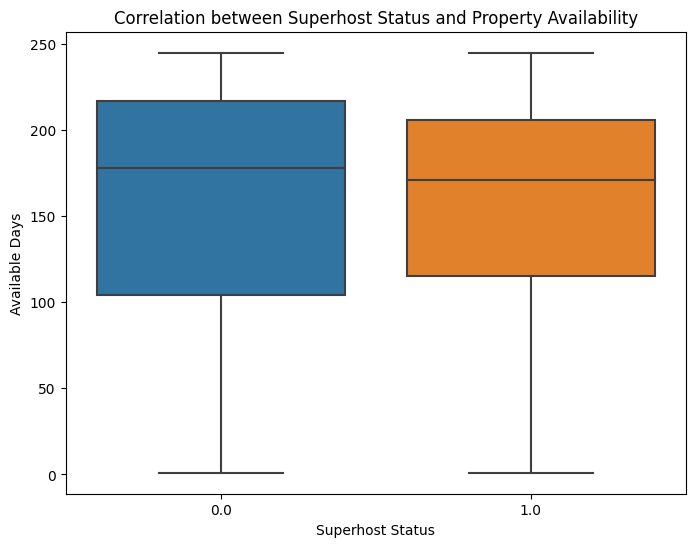

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('airbnb_Chicago.csv')

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# 'available_days' represents the number of days the listing is available for booking.

# Select relevant columns
selected_columns = ['Superhost', 'available_days']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Plot the correlation between 'Superhost' and 'available_days'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Superhost', y='available_days', data=df_selected)
plt.title('Correlation between Superhost Status and Property Availability')
plt.xlabel('Superhost Status')
plt.ylabel('Available Days')
plt.show()


traing a gradient boosting model

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('airbnb_Chicago.csv')

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# Features for prediction can include 'Nightly Rate', 'Rating Overall', 'number_of_reviews', 'available_days', etc.

# Select relevant columns
selected_columns = [
    'Superhost', 'Nightly Rate', 'Rating Overall',
    'numReviews_pastYear', 'available_days', 'Bedrooms', 'Bathrooms'
]

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Handle categorical variables (if any)
df_selected = pd.get_dummies(df_selected, columns=['Bedrooms', 'Bathrooms'], drop_first=True)

# Drop rows with missing values
df_selected = df_selected.dropna()

# Separate features and target variable
X = df_selected.drop('Superhost', axis=1)
y = df_selected['Superhost']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model for binary classification (logistic regression)
model = xgb.XGBClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of being a superhost

# Evaluate the model using ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, (y_pred_proba > 0.5).astype(int))
classification_rep = classification_report(y_test, (y_pred_proba > 0.5).astype(int))

# Print the evaluation metrics
print(f'ROC-AUC Score: {roc_auc:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


ROC-AUC Score: 0.89
Confusion Matrix:
[[8119 1777]
 [1477 5671]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      9896
         1.0       0.76      0.79      0.78      7148

    accuracy                           0.81     17044
   macro avg       0.80      0.81      0.81     17044
weighted avg       0.81      0.81      0.81     17044



Gradient boosting model graphs

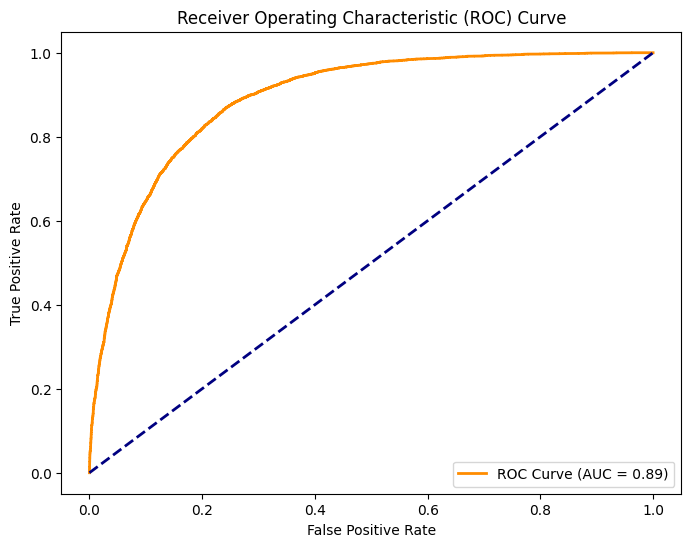

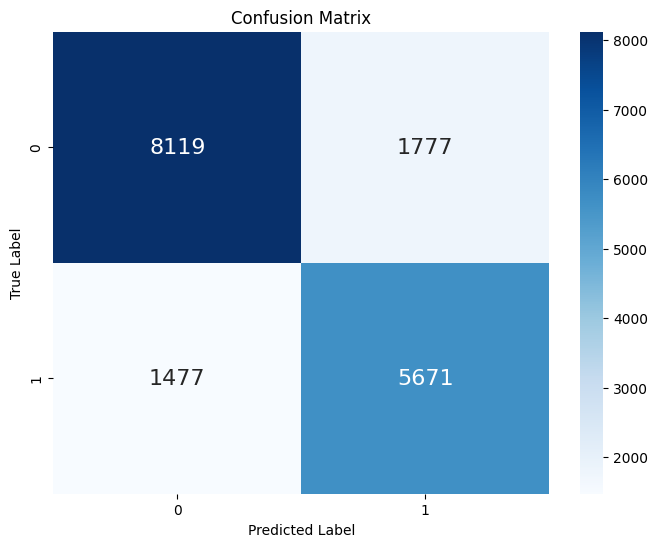

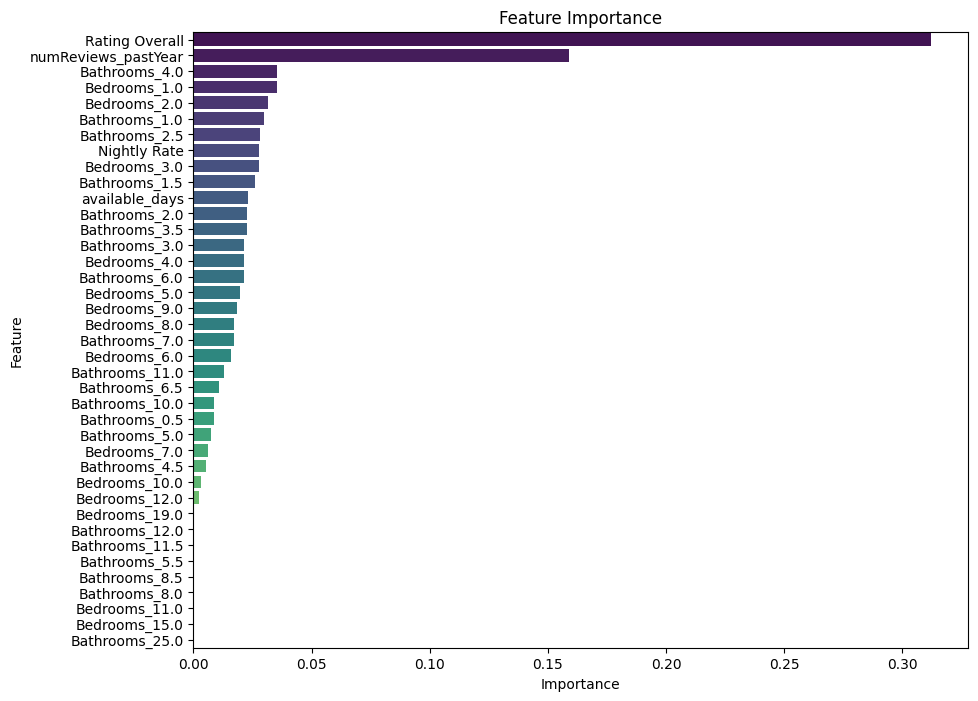

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Neural Network Hyperparameter tuning and optimization

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Load the dataset

# Assuming 'Superhost' is a binary column (1 for Superhost, 0 for non-Superhost)
# Features for prediction can include 'Nightly Rate', 'Rating Overall', 'number_of_reviews', 'available_days', etc.

# Select relevant columns
selected_columns = [
    'Superhost', 'Nightly Rate', 'Rating Overall',
    'numReviews_pastYear', 'available_days', 'Bedrooms', 'Bathrooms'
]

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Handle categorical variables (if any)
df_selected = pd.get_dummies(df_selected, columns=['Bedrooms', 'Bathrooms'], drop_first=True)

# Drop rows with missing values
df_selected = df_selected.dropna()

# Separate features and target variable
X = df_selected.drop('Superhost', axis=1)
y = df_selected['Superhost']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
def create_model(layers=2, neurons=64, dropout_rate=0.5):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    for _ in range(layers - 1):
        model.add(tf.keras.layers.Dropout(dropout_rate))
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))

    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Perform a manual hyperparameter search
best_params = None
best_roc_auc = 0.0

# Define hyperparameters for tuning
layers_values = [1, 2, 3]
neurons_values = [32, 64, 128]
dropout_values = [0.3, 0.5, 0.7]

# Iterate through hyperparameters
for layers in layers_values:
    for neurons in neurons_values:
        for dropout_rate in dropout_values:
            # Create and train the model
            model = create_model(layers=layers, neurons=neurons, dropout_rate=dropout_rate)
            model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=0)

            # Make predictions on the testing data
            y_pred_proba = model.predict(X_test_scaled)

            # Evaluate the model using ROC-AUC score
            roc_auc = roc_auc_score(y_test, y_pred_proba)

            # Update the best parameters if current model performs better
            if roc_auc > best_roc_auc:
                best_roc_auc = roc_auc
                best_params = {'layers': layers, 'neurons': neurons, 'dropout_rate': dropout_rate}

# Print the best parameters and corresponding ROC-AUC score
print("Best Parameters: ", best_params)
print("Best ROC-AUC Score: ", best_roc_auc)


533/533 [==============================] - 1s 2ms/step
Best Parameters:  {'layers': 3, 'neurons': 128, 'dropout_rate': 0.3}
Best ROC-AUC Score:  0.8678835787545822


Neural Network Graphs

533/533 [==============================] - 2s 4ms/step


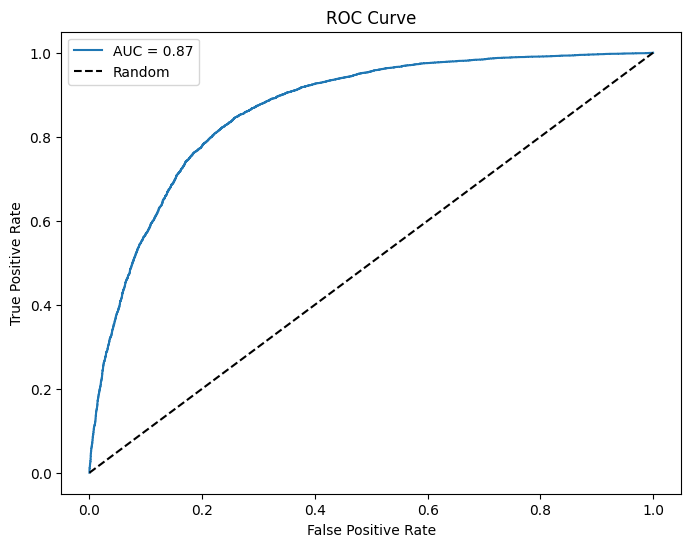

<Figure size 800x600 with 0 Axes>

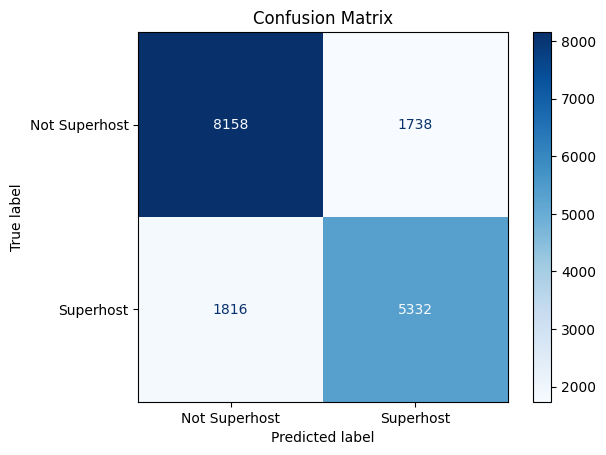

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Best hyperparameters
best_layers = best_params['layers']
best_neurons = best_params['neurons']
best_dropout_rate = best_params['dropout_rate']

# Create and train the final model
final_model = create_model(layers=best_layers, neurons=best_neurons, dropout_rate=best_dropout_rate)
final_model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=0)

# Make predictions on the testing data
y_pred_proba = final_model.predict(X_test_scaled)

# ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {best_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = (y_pred_proba > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Superhost', 'Superhost'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()
